In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.neighbors import NearestNeighbors

In [144]:
data_type={'inst_cd':str,'first_pay_diff_estab':float,'first_gather_diff_estab':float,'living_day':float}
raw_data=pd.DataFrame(pd.read_csv('../../data/all_feature_clean_v2.csv',header=0,index_col=0))
# raw_data.describe()

,is_resid_foreign_country,diff_day_fist_between,rmb_account_cnt,forex_account_cnt,other_account_cnt,bank_of_finan_cnt,total_trans_cnt,is_compelete_percent,amt_stddev,declar_preparer_name_cnt,...,is_tax_free,opposite_name_cnt,tax_free_opposite_name_ratio,foreign_company_trans_cnt,contractamount_percent,export_import_ratio,is_neg,pur_settle_exchange_ratio,contractamount_settle_ratio,export_settle_ratio
count,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,...,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.00000,99934.000000,99934.000000
mean,0.061691,12.677897,1.282236,1.384073,0.323764,2.822123,1.207631,0.087058,3.670448,3.999520,...,0.690115,14.266746,0.466578,67.287740,0.545006,8.180484,0.000360,2.04957,0.183827,1.060800
std,0.240594,15.137933,1.451839,1.712527,0.646557,2.151725,0.862415,0.194664,1.811942,3.949181,...,0.462448,25.263984,0.433495,121.315272,0.496102,3.631431,0.018977,3.96738,1.272563,2.246781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.477121,0.000000,3.304760,1.000000,...,0.000000,1.000000,0.000000,3.000000,0.000000,10.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,4.000000,1.000000,1.000000,0.000000,2.000000,1.204120,0.000000,4.248990,3.000000,...,1.000000,3.000000,0.333333,15.000000,1.000000,10.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,33.000000,1.000000,2.000000,1.000000,3.000000,1.838849,0.071000,4.789470,5.000000,...,1.000000,12.000000,1.000000,65.000000,1.000000,10.000000,0.000000,0.12974,0.000000,1.054479
max,1.000000,36.000000,10.000000,10.000000,5.000000,20.000000,5.166945,1.000000,8.688249,20.000000,...,1.000000,100.000000,1.000000,500.000000,1.000000,10.000000,1.000000,10.00000,10.000000,10.000000


In [132]:
raw_data[0:1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 324759865 to 324759865
Data columns (total 30 columns):
is_resid_foreign_country        1 non-null float64
first_pay_diff_estab            1 non-null object
first_gather_diff_estab         1 non-null object
living_day                      1 non-null object
diff_day_fist_between           1 non-null float64
rmb_account_cnt                 1 non-null float64
forex_account_cnt               1 non-null float64
other_account_cnt               1 non-null float64
bank_of_finan_cnt               1 non-null float64
total_trans_cnt                 1 non-null float64
is_compelete_percent            1 non-null float64
amt_stddev                      1 non-null float64
declar_preparer_name_cnt        1 non-null float64
declar_preparer_tel_cnt         1 non-null float64
tax_free_opposite_name_cnt      1 non-null float64
is_tax_free                     1 non-null float64
opposite_name_cnt               1 non-null float64
tax_free_opposite_name_r

## 标准化

In [145]:
standard_data = raw_data.apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x)))
standard_data = standard_data.drop(['is_neg'],axis=1)
standard_data.describe()

,is_resid_foreign_country,diff_day_fist_between,rmb_account_cnt,forex_account_cnt,other_account_cnt,bank_of_finan_cnt,total_trans_cnt,is_compelete_percent,amt_stddev,declar_preparer_name_cnt,tax_free_opposite_name_cnt,is_tax_free,opposite_name_cnt,tax_free_opposite_name_ratio,foreign_company_trans_cnt,contractamount_percent,export_import_ratio,pur_settle_exchange_ratio,contractamount_settle_ratio,export_settle_ratio
count,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000,99934.000000
mean,0.061691,0.352164,0.128224,0.138407,0.064753,0.141106,0.233723,0.087058,0.422461,0.199976,0.290600,0.690115,0.142667,0.466578,0.134575,0.545006,0.818048,0.204957,0.018383,0.106080
std,0.240594,0.420498,0.145184,0.171253,0.129311,0.107586,0.166910,0.194664,0.208551,0.197459,0.350511,0.462448,0.252640,0.433495,0.242631,0.496102,0.363143,0.396738,0.127256,0.224678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.092341,0.000000,0.380371,0.050000,0.000000,0.000000,0.010000,0.000000,0.006000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.111111,0.100000,0.100000,0.000000,0.100000,0.233043,0.000000,0.489050,0.150000,0.100000,1.000000,0.030000,0.333333,0.030000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.916667,0.100000,0.200000,0.200000,0.150000,0.355887,0.071000,0.551258,0.250000,0.400000,1.000000,0.120000,1.000000,0.130000,1.000000,1.000000,0.012974,0.000000,0.105448
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## kmeans 聚类

In [157]:
#设置要进行聚类的n字段
# use_column=['diff_day_fist_between','forex_account_cnt','other_account_cnt','bank_of_finan_cnt','amt_stddev','tax_free_opposite_name_cnt','is_tax_free','tax_free_opposite_name_ratio','total_import_price_cnt','total_expotrt_price_cnt','contractamount_dollar_sum','contractamount_percent']
kmeans_data = np.array(standard_data)
#设置类别为2
clf=KMeans(n_clusters=5)
#将数据代入到聚类模型中
clf=clf.fit(kmeans_data)
#
# print(clf.cluster_centers_)

#在原始数据表中增加聚类结果标签
raw_data['kmeans']=clf.labels_
raw_data[:3]

,is_resid_foreign_country,diff_day_fist_between,rmb_account_cnt,forex_account_cnt,other_account_cnt,bank_of_finan_cnt,total_trans_cnt,is_compelete_percent,amt_stddev,declar_preparer_name_cnt,...,contractamount_percent,export_import_ratio,is_neg,pur_settle_exchange_ratio,contractamount_settle_ratio,export_settle_ratio,kmeans,label,pca_x,pca_y
inst_cd,,,,,,,,,,,,,,,,,,,,,
324759865,0,8.0,2,3,1,6,3.101403,0.112,4.188422,1,...,1.0,10.0,0,0.0,0.0,0.956392,3,0.0,1.018259,0.261372
579652963,0,36.0,1,0,0,2,0.000000,1.000,0.000000,1,...,1.0,0.0,0,10.0,0.0,0.000000,0,1.0,-0.597280,1.296955
MA59BF5W9,0,0.0,1,0,0,1,0.000000,0.000,0.000000,1,...,0.0,10.0,0,10.0,0.0,0.000000,4,0.0,-0.357790,-0.734017


## 添加标注列

In [169]:
raw_data.loc[((raw_data['is_neg']==0) & (raw_data['kmeans']==0)),'label']=0
raw_data.loc[((raw_data['is_neg']==0) & (raw_data['kmeans']==1)),'label']=1
raw_data.loc[((raw_data['is_neg']==0) & (raw_data['kmeans']==2)),'label']=2
raw_data.loc[((raw_data['is_neg']==0) & (raw_data['kmeans']==3)),'label']=3
raw_data.loc[((raw_data['is_neg']==0) & (raw_data['kmeans']==4)),'label']=4
raw_data.loc[((raw_data['is_neg']==1) & (raw_data['kmeans']==0)),'label']=5
raw_data.loc[((raw_data['is_neg']==1) & (raw_data['kmeans']==1)),'label']=6
raw_data.loc[((raw_data['is_neg']==1) & (raw_data['kmeans']==2)),'label']=7
raw_data.loc[((raw_data['is_neg']==1) & (raw_data['kmeans']==3)),'label']=8
raw_data.loc[((raw_data['is_neg']==1) & (raw_data['kmeans']==4)),'label']=9
raw_data[:3]

,is_resid_foreign_country,diff_day_fist_between,rmb_account_cnt,forex_account_cnt,other_account_cnt,bank_of_finan_cnt,total_trans_cnt,is_compelete_percent,amt_stddev,declar_preparer_name_cnt,...,contractamount_percent,export_import_ratio,is_neg,pur_settle_exchange_ratio,contractamount_settle_ratio,export_settle_ratio,kmeans,label,pca_x,pca_y
inst_cd,,,,,,,,,,,,,,,,,,,,,
324759865,0,8.0,2,3,1,6,3.101403,0.112,4.188422,1,...,1.0,10.0,0,0.0,0.0,0.956392,3,3.0,1.018259,0.261372
579652963,0,36.0,1,0,0,2,0.000000,1.000,0.000000,1,...,1.0,0.0,0,10.0,0.0,0.000000,0,0.0,-0.597280,1.296955
MA59BF5W9,0,0.0,1,0,0,1,0.000000,0.000,0.000000,1,...,0.0,10.0,0,10.0,0.0,0.000000,4,4.0,-0.357790,-0.734017


## pca 降维

In [170]:
# loan_data.drop(['first_pay_diff_estab','first_gather_diff_estab','living_day'],axis=1,inplace=True)

X = np.array(standard_data)

# y= np.array(standard_data['label'])

pca1 = PCA(n_components=2)

pca1.fit(X)

X_ipca = pca1.transform(X)

raw_data['pca_x']=X_ipca[:,0]
raw_data['pca_y']=X_ipca[:,1]

## 降维后绘图

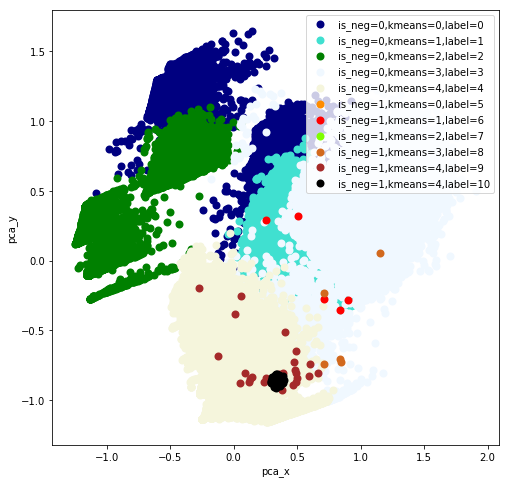

In [198]:
colors = ['navy', 'turquoise', 'darkorange','blue']

# 'aliceblue':            '#F0F8FF',
# 'antiquewhite':         '#FAEBD7',
# 'aqua':                 '#00FFFF',
# 'aquamarine':           '#7FFFD4',
# 'azure':                '#F0FFFF',
# 'beige':                '#F5F5DC',
# 'bisque':               '#FFE4C4',
# 'black':                '#000000',
# 'blanchedalmond':       '#FFEBCD',
# 'blue':                 '#0000FF',
# 'blueviolet':           '#8A2BE2',
# 'brown':                '#A52A2A',
# 'burlywood':            '#DEB887',
# 'cadetblue':            '#5F9EA0',
# 'chartreuse':           '#7FFF00',
# 'chocolate':            '#D2691E',
# 'coral':                '#FF7F50',
# 'cornflowerblue':  

plt.figure(figsize=(8, 8))
plt.scatter((np.array(raw_data.loc[raw_data['label']==0, 'pca_x'])), (np.array(raw_data.loc[raw_data['label']==0, 'pca_y'])), color='navy', lw=2, label='is_neg=0,kmeans=0,label=0')
plt.scatter((np.array(raw_data.loc[raw_data['label']==1, 'pca_x'])), (np.array(raw_data.loc[raw_data['label']==1, 'pca_y'])), color='turquoise', lw=2, label='is_neg=0,kmeans=1,label=1')
plt.scatter((np.array(raw_data.loc[raw_data['label']==2, 'pca_x'])), (np.array(raw_data.loc[raw_data['label']==2, 'pca_y'])), color='green', lw=2, label='is_neg=0,kmeans=2,label=2')
plt.scatter((np.array(raw_data.loc[raw_data['label']==3, 'pca_x'])), (np.array(raw_data.loc[raw_data['label']==3, 'pca_y'])), color='aliceblue', lw=2, label='is_neg=0,kmeans=3,label=3')
plt.scatter((np.array(raw_data.loc[raw_data['label']==4, 'pca_x'])), (np.array(raw_data.loc[raw_data['label']==4, 'pca_y'])), color='beige', lw=2, label='is_neg=0,kmeans=4,label=4')
plt.scatter((np.array(raw_data.loc[raw_data['label']==5, 'pca_x'])), (np.array(raw_data.loc[raw_data['label']==5, 'pca_y'])), color='darkorange', lw=2, label='is_neg=1,kmeans=0,label=5')
plt.scatter((np.array(raw_data.loc[raw_data['label']==6, 'pca_x'])), (np.array(raw_data.loc[raw_data['label']==6, 'pca_y'])), color='red', lw=2, label='is_neg=1,kmeans=1,label=6')
plt.scatter((np.array(raw_data.loc[raw_data['label']==7, 'pca_x'])), (np.array(raw_data.loc[raw_data['label']==7, 'pca_y'])), color='chartreuse', lw=2, label='is_neg=1,kmeans=2,label=7')
plt.scatter((np.array(raw_data.loc[raw_data['label']==8, 'pca_x'])), (np.array(raw_data.loc[raw_data['label']==8, 'pca_y'])), color='chocolate', lw=2, label='is_neg=1,kmeans=3,label=8')
plt.scatter((np.array(raw_data.loc[raw_data['label']==9, 'pca_x'])), (np.array(raw_data.loc[raw_data['label']==9, 'pca_y'])), color='brown', lw=2, label='is_neg=1,kmeans=4,label=9')
plt.scatter((np.array(raw_data_label_4_all.iloc[indices[0]]['pca_x'])), (np.array(raw_data_label_4_all.iloc[indices[0]]['pca_y'])), color='black', lw=2, label='is_neg=1,kmeans=4,label=10')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("pca_x")
plt.ylabel("pca_y")
plt.show()

In [161]:
index_9= raw_data.loc[raw_data['label']==9].index
index_9

Index(['327559308', '769301179', '054523165', '070156609', '070166348',
       '351946738', '564594158', '562261456', '304374538', '304504494',
       '093559750', '092382930', '331356423', '569788656', '340151649',
       '327562742', '304595621', '769306295', '769306308', '052593979',
       '304766224', '06510242X', '576028313', '05370997X', '59212863X',
       '574457093'],
      dtype='object', name='inst_cd')

In [ ]:
index_4= raw_data.loc[raw_data['label']==4].index
index_4

In [177]:
raw_data_label_9_down = raw_data[((raw_data['label']==9) & (raw_data['pca_y']<-0.5))]
raw_data_label_9 = raw_data[(raw_data['label']==9)]
# raw_data_label_9_down
len(raw_data_label_9)

26

## 找到label 为9 的样本的标准数据中心

In [180]:
# standard_data_with_label=standard_data.copy()
# standard_data_with_label['label']=raw_data['label']
# standard_data_with_label[:3]
raw_data_label_9_down[['pca_x','pca_y']]

,pca_x,pca_y
inst_cd,,
327559308,0.141680,-0.834687
769301179,0.488172,-0.647784
054523165,0.088857,-0.807785
070156609,0.049453,-0.880483
070166348,0.116876,-0.868450
351946738,-0.122023,-0.685615
564594158,0.661430,-0.802835
562261456,0.400866,-0.513846
304374538,0.132104,-0.849132


In [ ]:
standard_data_with_label_9 = standard_data_with_label.loc[standard_data_with_label['label']==9]
standard_data_with_label_9[:3]

In [194]:
#设置要进行聚类的n字段
# use_column=['diff_day_fist_between','forex_account_cnt','other_account_cnt','bank_of_finan_cnt','amt_stddev','tax_free_opposite_name_cnt','is_tax_free','tax_free_opposite_name_ratio','total_import_price_cnt','total_expotrt_price_cnt','contractamount_dollar_sum','contractamount_percent']
kmeans_standard_data_with_label_9 = np.array(raw_data_label_9_down[['pca_x','pca_y']])
#设置类别为2
clf=KMeans(n_clusters=3)
#将数据代入到聚类模型中
clf=clf.fit(kmeans_standard_data_with_label_9)
#
print(clf.cluster_centers_)

[[ 0.3433612  -0.86418104]
 [ 0.51837586 -0.75575944]
 [ 0.06782459 -0.82102529]]


In [195]:
# standard_data_with_label_4 = standard_data_with_label.loc[standard_data_with_label['label']==4]
# standard_data_with_label_4[:3]
raw_data_label_4_all =  raw_data[(raw_data['label']==4)]
raw_data_label_4_all[:3]

,is_resid_foreign_country,diff_day_fist_between,rmb_account_cnt,forex_account_cnt,other_account_cnt,bank_of_finan_cnt,total_trans_cnt,is_compelete_percent,amt_stddev,declar_preparer_name_cnt,...,contractamount_percent,export_import_ratio,is_neg,pur_settle_exchange_ratio,contractamount_settle_ratio,export_settle_ratio,kmeans,label,pca_x,pca_y
inst_cd,,,,,,,,,,,,,,,,,,,,,
MA59BF5W9,0,0.0,1,0,0,1,0.00000,0.0,0.000000,1,...,0.0,10.0,0,10.0,0.0,0.0,4,4.0,-0.357790,-0.734017
791215330,0,0.0,2,0,0,2,1.00000,0.0,5.568829,1,...,0.0,10.0,0,10.0,0.0,0.0,4,4.0,-0.110764,-0.681748
355772560,0,0.0,0,0,1,1,0.90309,0.0,2.911690,3,...,0.0,10.0,0,0.0,0.0,0.0,4,4.0,-0.063564,-0.930824


In [197]:
centers= clf.cluster_centers_
X = np.array(raw_data_label_4_all[['pca_x','pca_y']])
nbrs = NearestNeighbors(n_neighbors=50, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(centers)

In [89]:
distances

array([[5.02149178, 5.02751464, 5.02950011, 5.03179857, 5.03188499,
        5.03230091, 5.03277714, 5.03314738, 5.0338572 , 5.03395121,
        5.0348108 , 5.03498964, 5.03544105, 5.03583765, 5.03596051,
        5.03634501, 5.03653916, 5.03669348, 5.03671345, 5.03687074,
        5.0369742 , 5.03723563, 5.0373222 , 5.03745292, 5.03779437,
        5.03789359, 5.0379261 , 5.03815523, 5.0385758 , 5.03877465,
        5.03892717, 5.03900449, 5.03923643, 5.0392525 , 5.03939782,
        5.03940491, 5.03949985, 5.03965767, 5.03968432, 5.03996025,
        5.04004846, 5.04017857, 5.04029225, 5.04031795, 5.04071139,
        5.04072851, 5.04077887, 5.04080719, 5.04105545, 5.04107452]])

In [186]:
indices[0]

array([13036,  9408,  4814,  6968,  4329, 11329, 20488, 24882, 15636,
       12087, 19214,  3207, 24863, 25755, 23389, 21251, 23416,  2700,
       13355, 14861, 11014, 20898,   188,  9336, 22547,  9200, 19058,
         596, 14368,   479, 16569, 18657, 20922, 23647, 10039,  3947,
       10836, 10922, 22636,  9833, 21804,  1521,   418,  4139,  8962,
        2140,  3965, 20413, 13889, 10966], dtype=int64)

In [199]:
raw_data_label_4_all.iloc[indices[0]].to_csv('../../data/black_company_v2_2.csv')